# Datan käsittely


In [220]:
import pandas as pd
import numpy as np
from sklearn import linear_model # pip install scikit-learn
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
viini = 'white'

# luetaan tiedosto dataframeen
df = pd.read_csv(f'winequality-{viini}.csv', sep=';')

# poistetaan quality
df = df.drop(columns=['quality'])

# poistetaan duplikaatit
df.drop_duplicates(inplace=True)

In [222]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


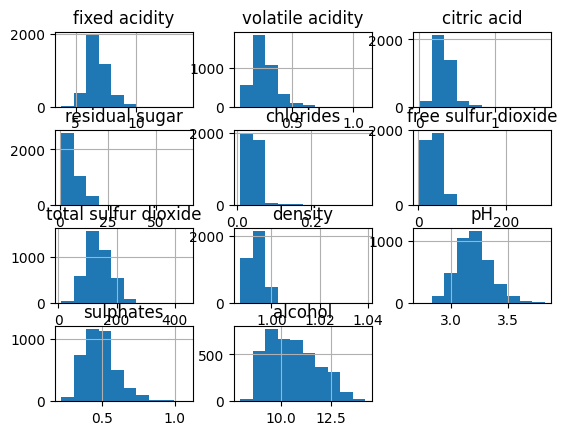

In [223]:
df.hist(bins=10)
plt.show()

In [224]:
X = df.iloc[:,0:10] # selittävät muuttujat
Y = df.iloc[:, -1] # alkoholi on vastemuuttuja
#print(X)
#print(Y)

## jaetaan data testi- ja opetusdataan

In [225]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print(x_train.shape)
print(x_test.shape)


(3168, 10)
(793, 10)


# mallinnus

In [226]:
reg = linear_model.LinearRegression()
#sovitetaan arvot malliin
reg.fit(X, Y)

LinearRegression()

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
dtypes: float64(11)
memory usage: 371.3 KB


In [228]:
print(reg.feature_names_in_)
print("\ncoefficients / kulmakertoimet", reg.coef_)
print("\nintercepts / vakiotermi", reg.intercept_)


['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates']

coefficients / kulmakertoimet [ 5.08985834e-01  8.91433570e-01  4.16880125e-01  2.42749178e-01
 -3.94341133e-01 -3.33635324e-03  2.79786508e-04 -6.87861040e+02
  2.42818063e+00  1.01964556e+00]

intercepts / vakiotermi 680.7090390332885


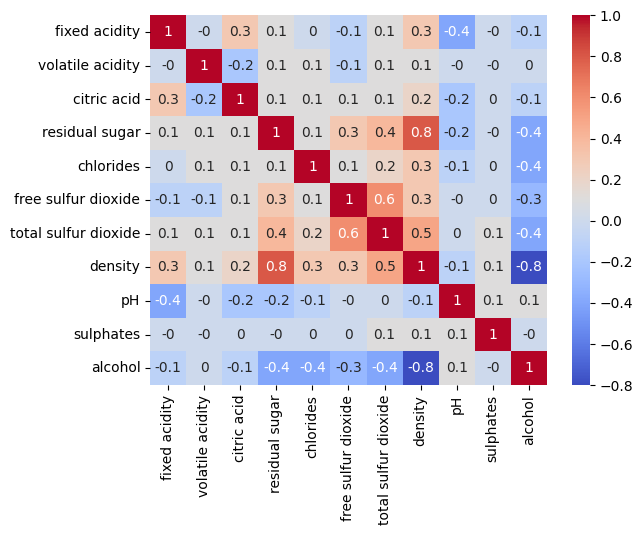

In [229]:
kor = df.corr().round(1)
sns.heatmap(kor, annot=True, cmap='coolwarm')
# kor_masked = kor.mask(kor.abs() < 0.4)
plt.show()

## testataan mallin luotettavuutta 

In [230]:

y_pred = reg.predict(x_test)
y_pred

array([ 9.47049029,  9.05860856, 10.84145139,  9.36881308,  8.87676491,
       12.28840576, 11.86412464,  9.92895559, 11.27238038, 11.04767878,
       11.19273451, 13.31567528, -3.9874961 , 11.2454989 , 11.50162643,
       10.52248715,  9.04178435, 10.57982369, 10.20189486,  9.34967182,
       10.75156234,  9.92449949, 10.55046463,  9.57089386, 13.11491564,
       11.26952562, 12.48501909, 12.05634628,  9.43387128, 12.18258928,
       10.99638535, 12.74322176, 10.09627379, 10.67912173,  9.32638113,
        9.81718155, 10.31985865,  9.61773971, 11.5909154 ,  9.93281455,
       12.18430695, 11.74749356, 11.18881257, 11.05841565, 10.64116702,
        9.26328774, 10.31590243,  9.58156785,  9.33330646,  8.41385234,
        9.95412475, 10.28438046, 10.74002632, 10.76013789, 10.36152231,
        9.35664766, 10.35402361,  9.06769038, 11.91183185, 12.6871442 ,
       12.23113942,  9.97603505, 10.66308526,  8.531907  ,  9.92958469,
       12.9189129 , 10.51905941,  9.55986764, 10.31530517,  9.45

## testataan mallin hyvyyttä käyttäen RMSE ja R2

In [231]:
rmse = root_mean_squared_error(y_test, y_pred) # vastemuuttuja ja ennustettu vastemuuttuja
r2 = r2_score(y_test, y_pred)    # selittää kuinka hyvin malli selittää datan varianssia

print("RMSE: ", rmse) # mikä on hyväksyttävä virhe?
print("R2: ", r2) # yksinään ei kerro mitään, tällä vertaillaan malleja toisiinsa ja 0.8 on hyvä tulos

RMSE:  0.6655662139993619
R2:  0.7102529215555103


In [232]:
print(df.shape)


(3961, 11)


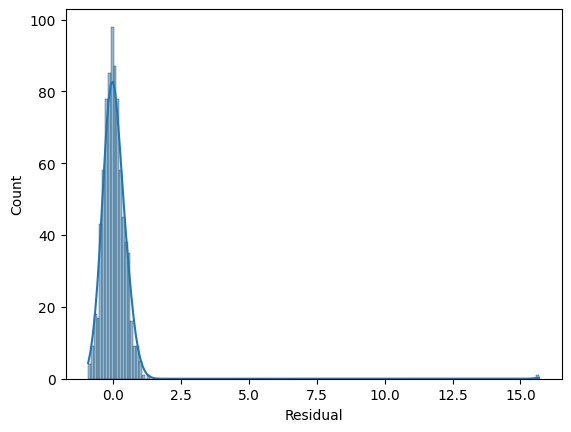

In [233]:
df2 = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred), pd.Series(y_test.reset_index(drop=True) - y_pred)], axis=1)
df2.columns = ['Actual', 'Predicted', 'Residual']
sns.histplot(df2['Residual'], kde=True) # kde = True, näyttää tiheysfunktion
plt.show()

<Figure size 640x480 with 0 Axes>

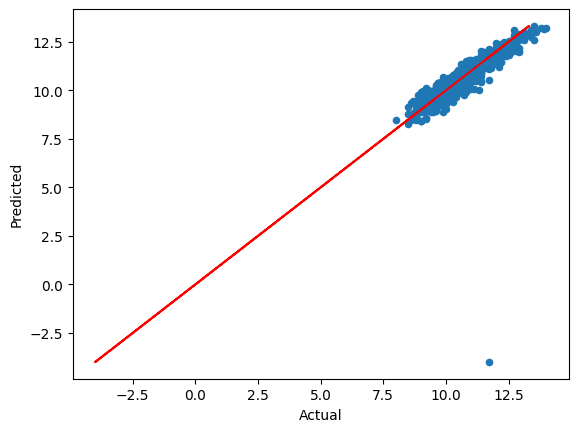

In [234]:
plt.figure()
df2.plot.scatter(x='Actual', y='Predicted')
plt.plot(y_pred, y_pred, color='red')
plt.show()

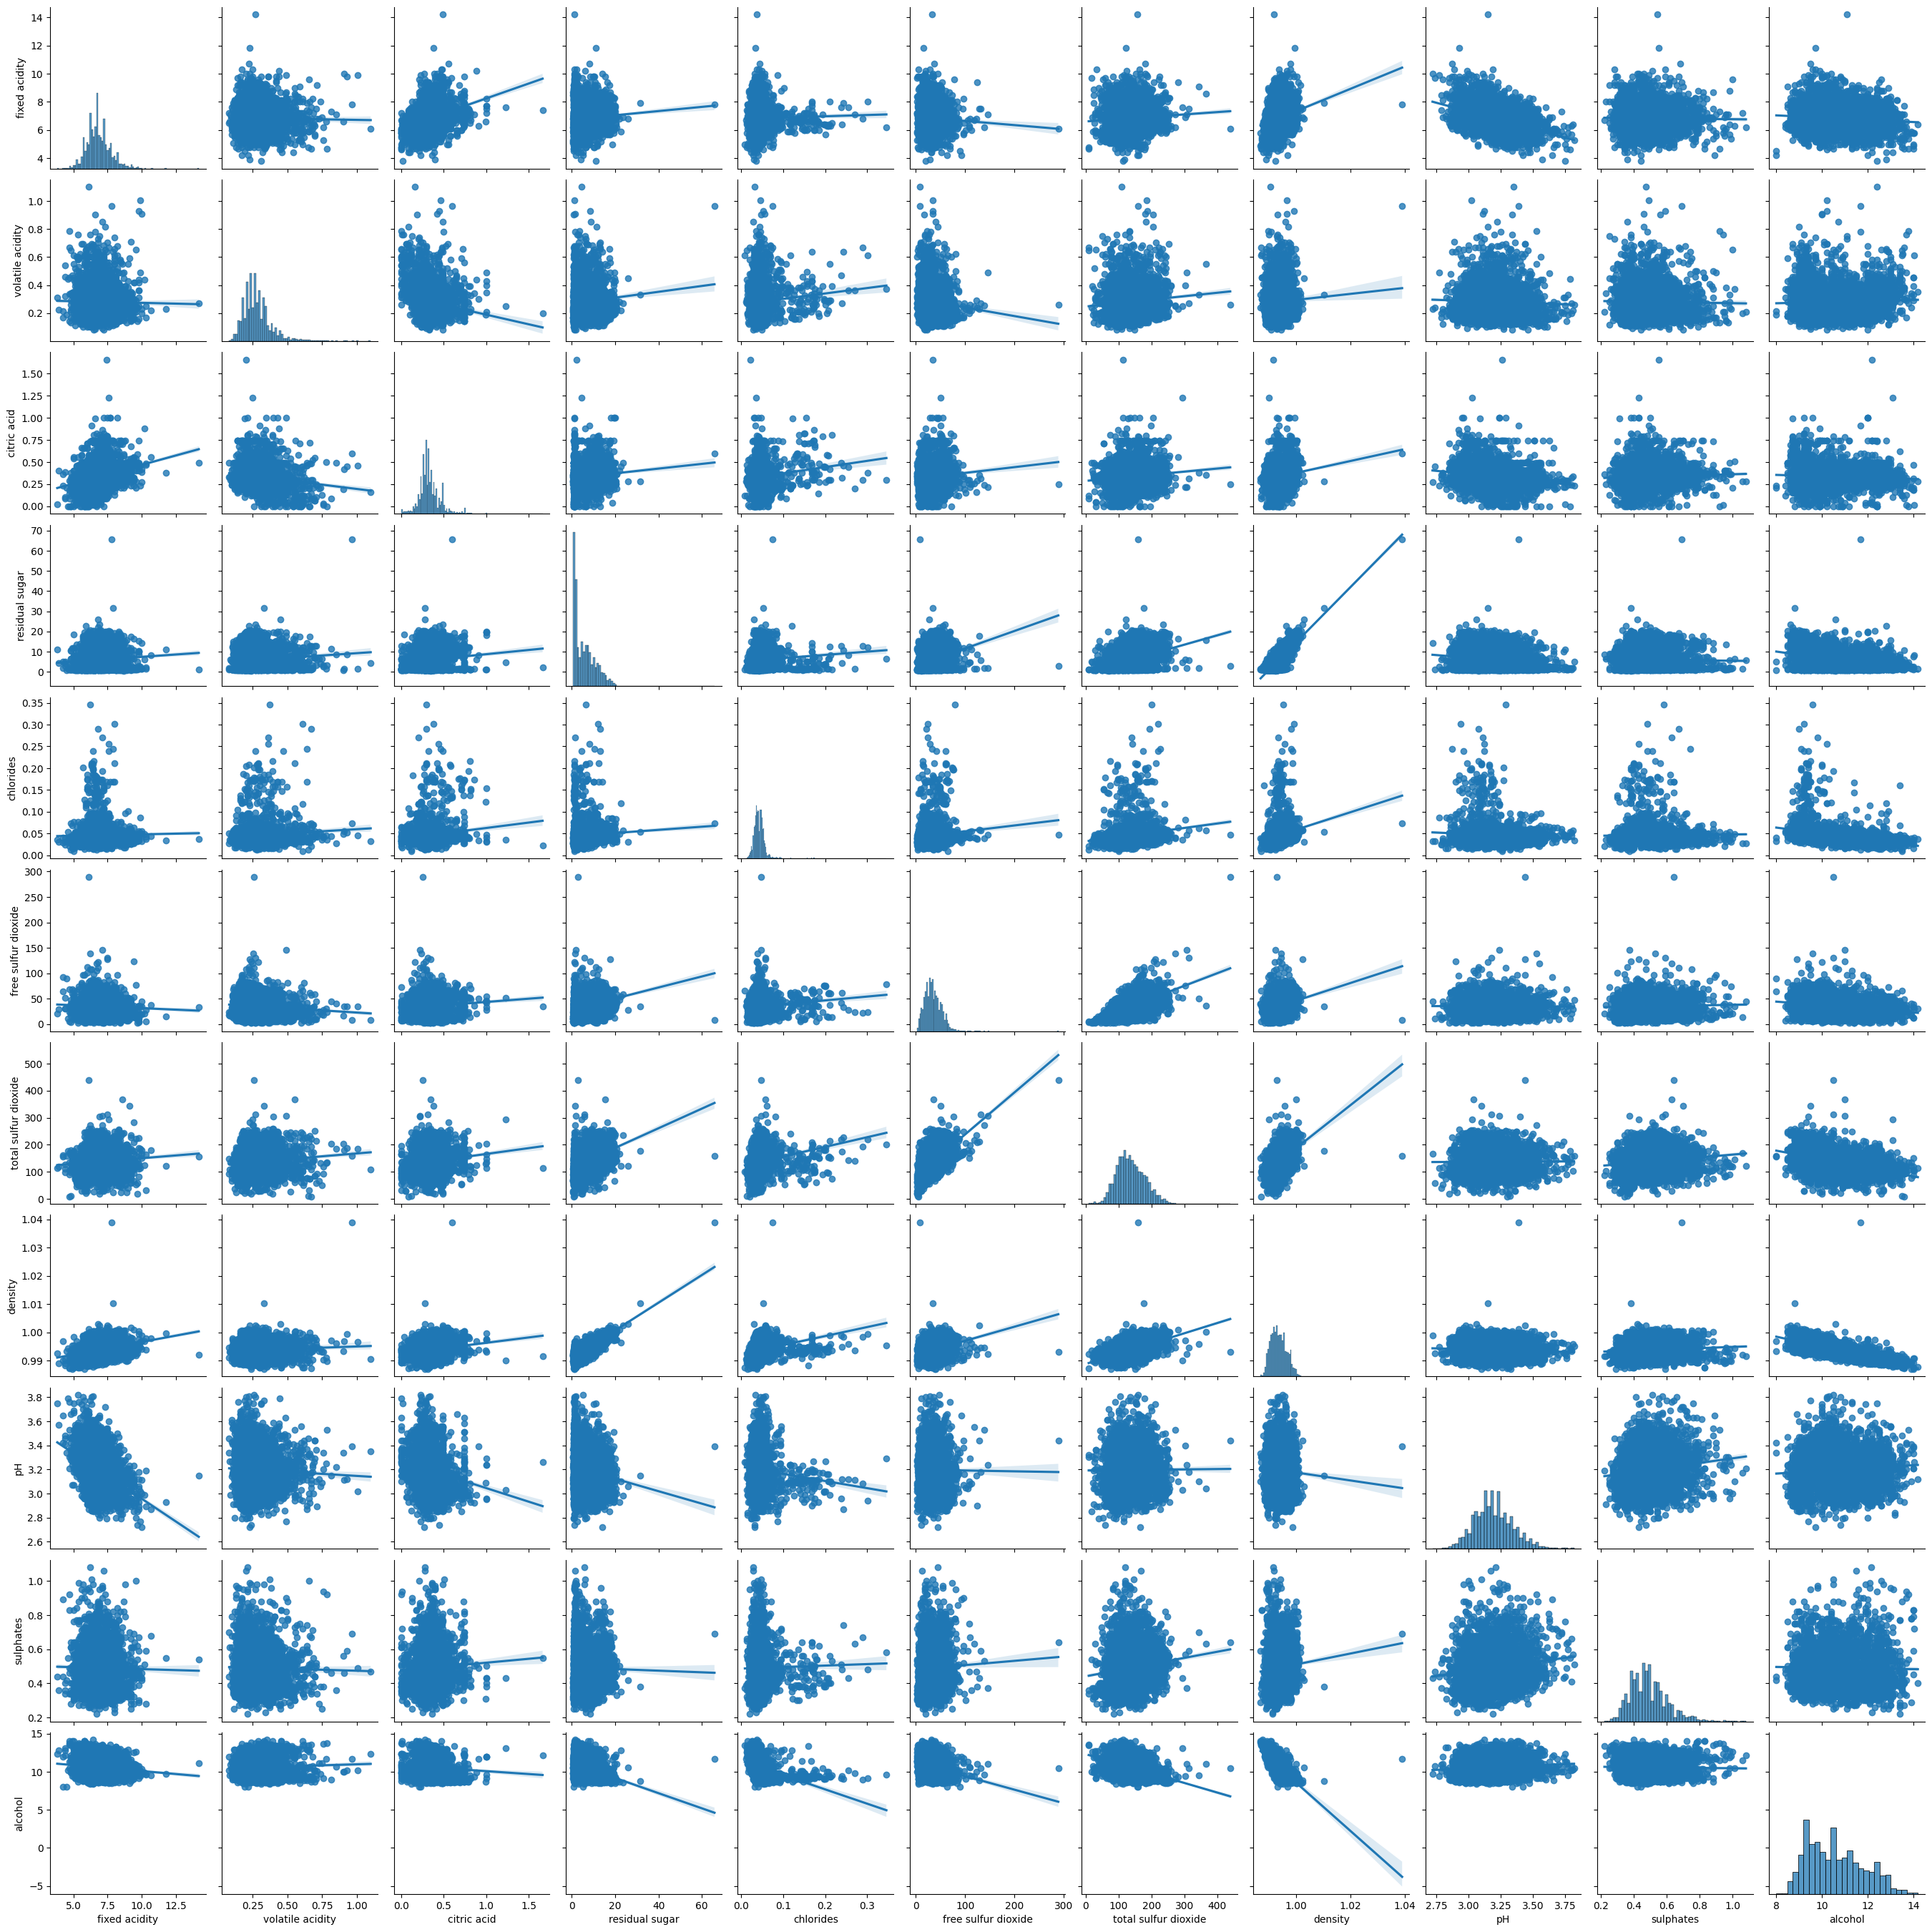

In [235]:
sns.pairplot(data=df, kind = 'reg') # kind = 'reg' lisää regressiosuoran
plt.show()

In [236]:
# standardisointi
scaler = StandardScaler()
dfscaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
dfscaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.185352,-0.101889,0.209651,3.041572,-0.039181,0.587571,0.760754,2.482748,-1.289928,-0.355488,-1.470396
1,-0.622262,0.188179,0.046294,-0.887634,0.133981,-1.213933,-0.120433,0.072470,0.689924,-0.003092,-0.895174
2,1.454460,-0.005199,0.536367,0.202669,0.177271,-0.284124,-0.932053,0.451228,0.425944,-0.443587,-0.402127
3,0.416099,-0.488646,-0.117064,0.531817,0.523594,0.703797,1.131781,0.623391,-0.036022,-0.795984,-0.566476
4,-0.737636,0.381558,-1.423927,0.223241,-0.039181,-0.284124,-0.027677,0.382363,-0.102017,-0.179290,-0.813000


## mallinnus uudestaan standardoiduilla arvoilla

In [237]:
Xscaled = dfscaled.iloc[:, 0:10]
Yscaled = dfscaled.iloc[:, 10]

In [238]:
reg2 = linear_model.LinearRegression()
# sovitetaan
reg2.fit(Xscaled, Yscaled)
print("coefficient / kulmakerroin:", reg2.coef_)
print("intercept / vakiotermi:", reg2.intercept_)
print(reg2.feature_names_in_)

# suurin vaikutus alkoholipitoisuuteen on fixed density (-1,1) ja fixed acidity (0,88)

coefficient / kulmakerroin: [ 0.36252396  0.07576131  0.04194095  0.96966857 -0.00748544 -0.04717757
  0.00991469 -1.64160477  0.30234753  0.09510745]
intercept / vakiotermi: 2.016547113447171e-14
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates']


In [240]:
d = dict(zip(reg2.feature_names_in_, reg2.coef_.tolist()))
d = dict(sorted(d.items(), key=lambda x: abs(x[1]), reverse=True))
d

# punaviini
# {'density': -1.0761752238252762,
#  'fixed acidity': 0.8746359539806688,
#  'pH': 0.5430758234836682,
#  'residual sugar': 0.36403755552643796,
#  'sulphates': 0.2000852029680379,
#  'citric acid': 0.12947493142266003,
#  'total sulfur dioxide': -0.07359285487971484,
#  'chlorides': -0.05865230096125324,
#  'volatile acidity': 0.04865860257977672,
#  'free sulfur dioxide': -0.020255278227427162}

{'density': -1.6416047662131241,
 'residual sugar': 0.9696685682888382,
 'fixed acidity': 0.36252396317381846,
 'pH': 0.30234752557389527,
 'sulphates': 0.09510744968697125,
 'volatile acidity': 0.0757613067237084,
 'free sulfur dioxide': -0.047177574194584404,
 'citric acid': 0.04194095405248249,
 'total sulfur dioxide': 0.00991468689907593,
 'chlorides': -0.007485439192849511}